<a href="https://colab.research.google.com/github/Inconsequential-24/StockTrendAnalysis/blob/main/StockTrendAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DOWNLOAD AND LOAD DATASET FROM HERE:** *https://docs.google.com/spreadsheets/d/1aHmANVDq7UqAzJN9zT7L52lWTO_0r7QH/edit?usp=drive_link&ouid=102119618608907686705&rtpof=true&sd=true*

**Importing required libraries:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, mean_squared_error

**Loading the Dataset:**

In [ ]:
stock_data = pd.read_excel('/content/yahoo_data.xlsx')

**Data Preprocessing, Data Fitting and Data Normalization**

In [ ]:
stock_data['Open'] = stock_data['Open'].replace({',': ''}, regex=True).astype(float)
stock_data['High'] = stock_data['High'].replace({',': ''}, regex=True).astype(float)
stock_data['Low'] = stock_data['Low'].replace({',': ''}, regex=True).astype(float)
stock_data['Close*'] = stock_data['Close*'].replace({',': ''}, regex=True).astype(float)
stock_data['Adj Close**'] = stock_data['Adj Close**'].replace({',': ''}, regex=True).astype(float)
stock_data['Volume'] = stock_data['Volume'].replace({',': ''}, regex=True).astype(int)

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

stock_data = stock_data.sort_values(by='Date')

stock_data['Price_Up'] = (stock_data['Close*'].shift(-1) > stock_data['Close*']).astype(int)

def calculate_moving_average(data, window=50):
    return data['Close*'].rolling(window=window).mean()

stock_data['MA_50'] = calculate_moving_average(stock_data)


stock_data['Prev_Close'] = stock_data['Close*'].shift(1)

import numpy as np
np.random.seed(42)  # For reproducibility
stock_data['News_Sentiment'] = np.random.rand(len(stock_data))

stock_data.fillna(method='ffill', inplace=True)

**Data Description:**

In [ ]:
print("Head of the dataset:")
print(stock_data.head())

print("\nDescription of the dataset:")
print(stock_data.describe())

Head of the dataset:
           Date      Open      High       Low    Close*  Adj Close**  \
1257 2018-05-01  24117.29  24117.29  23808.19  24099.05     24099.05   
1256 2018-05-02  24097.63  24185.52  23886.30  23924.98     23924.98   
1255 2018-05-03  23836.23  23996.15  23531.31  23930.15     23930.15   
1254 2018-05-04  23865.22  24333.35  23778.87  24262.51     24262.51   
1253 2018-05-07  24317.66  24479.45  24263.42  24357.32     24357.32   

         Volume  Price_Up  MA_50  Prev_Close  News_Sentiment  
1257  380070000         0    NaN         NaN        0.374540  
1256  385350000         1    NaN    24099.05        0.950714  
1255  389240000         1    NaN    23924.98        0.731994  
1254  329480000         1    NaN    23930.15        0.598658  
1253  307670000         1    NaN    24262.51        0.156019  

Description of the dataset:
               Open          High           Low        Close*   Adj Close**  \
count   1258.000000   1258.000000   1258.000000   1258.00000

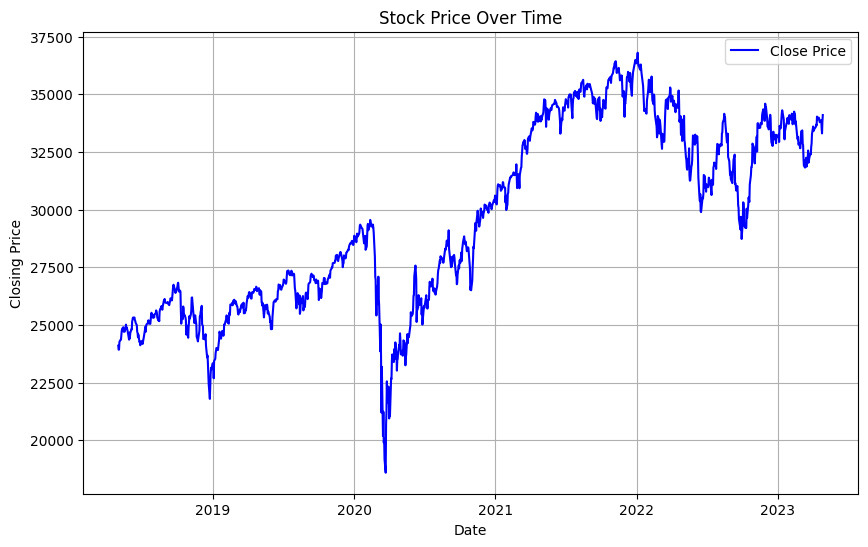

In [ ]:
# Data Visualization
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Date'], stock_data['Close*'], label='Close Price', color='blue')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


**BINARY CLASSIFICATION MODEL: LOGISTIC REGRESSION**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score

stock_data = pd.read_excel('/content/yahoo_data.xlsx')

stock_data['Price_Change'] = stock_data['Close*'].diff()

stock_data['Target_Binary'] = (stock_data['Price_Change'] > 0).astype(int)

stock_data['5_day_MA'] = stock_data['Close*'].rolling(window=5).mean()
stock_data['10_day_MA'] = stock_data['Close*'].rolling(window=10).mean()

X_binary = stock_data[['Price_Change', 'Volume', '5_day_MA', '10_day_MA']]

y_binary = stock_data['Target_Binary']

X_train_bin, X_temp_bin, y_train_bin, y_temp_bin = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)
X_val_bin, X_test_bin, y_val_bin, y_test_bin = train_test_split(X_temp_bin, y_temp_bin, test_size=0.5, random_state=42)

imputer = SimpleImputer(strategy='mean')
X_train_bin_imputed = imputer.fit_transform(X_train_bin)
X_val_bin_imputed = imputer.transform(X_val_bin)
X_test_bin_imputed = imputer.transform(X_test_bin)

logistic_regression_model = LogisticRegression(random_state=42)

logistic_regression_model.fit(X_train_bin_imputed, y_train_bin)

y_pred_bin = logistic_regression_model.predict(X_test_bin_imputed)

accuracy_bin = accuracy_score(y_test_bin, y_pred_bin)
precision_bin = precision_score(y_test_bin, y_pred_bin)

print(f'Accuracy (Logistic Regression): {accuracy_bin:.4f}')
print(f'Precision (Logistic Regression): {precision_bin:.4f}')


Accuracy (Logistic Regression): 0.5608
Precision (Logistic Regression): 0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**BINARY CLASSIFIACTION MODEL: HISTGRADIENTBOOSTINGCLASSIFIER**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score

stock_data = pd.read_excel('/content/yahoo_data.xlsx')

stock_data['Price_Change'] = stock_data['Close*'].diff()

stock_data['Target_Binary'] = (stock_data['Price_Change'] > 0).astype(int)

stock_data['5_day_MA'] = stock_data['Close*'].rolling(window=5).mean()
stock_data['10_day_MA'] = stock_data['Close*'].rolling(window=10).mean()

X_binary = stock_data[['Price_Change', 'Volume', '5_day_MA', '10_day_MA']]

y_binary = stock_data['Target_Binary']

X_train_bin, X_temp_bin, y_train_bin, y_temp_bin = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)
X_val_bin, X_test_bin, y_val_bin, y_test_bin = train_test_split(X_temp_bin, y_temp_bin, test_size=0.5, random_state=42)

imputer = SimpleImputer(strategy='mean')

hist_gb_classifier_model = HistGradientBoostingClassifier(random_state=42)

from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('classifier', hist_gb_classifier_model)
])

pipeline.fit(X_train_bin, y_train_bin)

y_pred_bin = pipeline.predict(X_test_bin)

accuracy_bin = accuracy_score(y_test_bin, y_pred_bin)
precision_bin = precision_score(y_test_bin, y_pred_bin)

print(f'Accuracy (HistGradientBoostingClassifier): {accuracy_bin:.4f}')
print(f'Precision (HistGradientBoostingClassifier): {precision_bin:.4f}')


Accuracy (HistGradientBoostingClassifier): 1.0000
Precision (HistGradientBoostingClassifier): 1.0000


**BINARY CLASSIFIACTION MODEL: RANDOM FOREST CLASSIFIER**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score
stock_data = pd.read_excel('/content/yahoo_data.xlsx')

stock_data['Price_Change'] = stock_data['Close*'].diff()

stock_data['Target_Binary'] = (stock_data['Price_Change'] > 0).astype(int)

stock_data['5_day_MA'] = stock_data['Close*'].rolling(window=5).mean()
stock_data['10_day_MA'] = stock_data['Close*'].rolling(window=10).mean()

X_binary = stock_data[['Price_Change', 'Volume', '5_day_MA', '10_day_MA']]

y_binary = stock_data['Target_Binary']

X_train_bin, X_temp_bin, y_train_bin, y_temp_bin = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)
X_val_bin, X_test_bin, y_val_bin, y_test_bin = train_test_split(X_temp_bin, y_temp_bin, test_size=0.5, random_state=42)

imputer = SimpleImputer(strategy='mean')

X_train_bin_imputed = imputer.fit_transform(X_train_bin)

X_val_bin_imputed = imputer.transform(X_val_bin)
X_test_bin_imputed = imputer.transform(X_test_bin)

random_forest_classifier_model = RandomForestClassifier(random_state=42)

random_forest_classifier_model.fit(X_train_bin_imputed, y_train_bin)

y_pred_bin = random_forest_classifier_model.predict(X_test_bin_imputed)

accuracy_bin = accuracy_score(y_test_bin, y_pred_bin)
precision_bin = precision_score(y_test_bin, y_pred_bin)

print(f'Accuracy (Random Forest Classifier): {accuracy_bin:.4f}')
print(f'Precision (Random Forest Classifier): {precision_bin:.4f}')


Accuracy (Random Forest Classifier): 1.0000
Precision (Random Forest Classifier): 1.0000


**BINARY CLASSIFIACTION MODEL: KNN CLASSIFIER**

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score

stock_data = pd.read_excel('/content/yahoo_data.xlsx')

stock_data['Price_Change'] = stock_data['Close*'].diff()

stock_data['Target_Binary'] = (stock_data['Price_Change'] > 0).astype(int)

stock_data['5_day_MA'] = stock_data['Close*'].rolling(window=5).mean()
stock_data['10_day_MA'] = stock_data['Close*'].rolling(window=10).mean()

X_binary = stock_data[['Price_Change', 'Volume', '5_day_MA', '10_day_MA']]

y_binary = stock_data['Target_Binary']

X_train_bin, X_temp_bin, y_train_bin, y_temp_bin = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)
X_val_bin, X_test_bin, y_val_bin, y_test_bin = train_test_split(X_temp_bin, y_temp_bin, test_size=0.5, random_state=42)

imputer = SimpleImputer(strategy='mean')

X_train_bin_imputed = imputer.fit_transform(X_train_bin)

X_val_bin_imputed = imputer.transform(X_val_bin)
X_test_bin_imputed = imputer.transform(X_test_bin)

knn_classifier_model = KNeighborsClassifier()

knn_classifier_model.fit(X_train_bin_imputed, y_train_bin)

y_pred_bin_knn = knn_classifier_model.predict(X_test_bin_imputed)

accuracy_bin_knn = accuracy_score(y_test_bin, y_pred_bin_knn)
precision_bin_knn = precision_score(y_test_bin, y_pred_bin_knn)

print(f'Accuracy (KNN Classifier): {accuracy_bin_knn:.4f}')
print(f'Precision (KNN Classifier): {precision_bin_knn:.4f}')


Accuracy (KNN Classifier): 0.4868
Precision (KNN Classifier): 0.4103


*BEST ACCURACY AND PRECISION IS FOR RANDOM FOREST CLASSIFIER MODEL AND HISTOGRAM GRADIENT BOOSTING CLASSIFIER HOWEVER, HISTOGRAM GRADIENT BOOSTING CLASSIFIER IS GENERALLY SLOW TO TRAIN MODELS, WE ARE OPTING TO USE THE RANDOM FOREST CLASSIFIER ML MODEL*

**ML MODEL FOR SHOWING FUTURE STOCK TRENDS**

Enter the stock code for the desired company (e.g., AAPL for Apple Inc.): aapl


[*********************100%%**********************]  1 of 1 completed


Enter the opening stock price for the desired company: 5000
Enter the closing stock price for the desired company: 3000
Predicted Stock Trend: Stock Price will go UP.


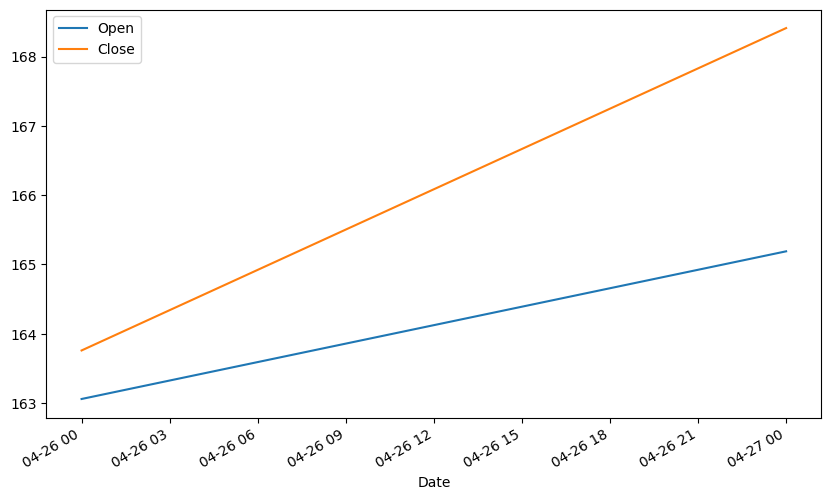

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def get_stock_data(stock_code):
    stock_data = yf.download(stock_code, start="2023-04-26", end="2023-04-28")
    return stock_data

def prepare_dataset(stock_data):
    stock_data['Price_Up'] = np.where(stock_data['Close'] > stock_data['Open'], 1, 0)
    X = stock_data[['Open', 'Close']].values
    y = stock_data['Price_Up'].values
    return X, y

def main():
    user_input = input("Enter the stock code for the desired company (e.g., AAPL for Apple Inc.): ")
    stock_data = get_stock_data(user_input)

    X, y = prepare_dataset(stock_data)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)

    user_open = float(input("Enter the opening stock price for the desired company: "))
    user_close = float(input("Enter the closing stock price for the desired company: "))
    X_user = np.array([[user_open, user_close]])
    predicted_trend = clf.predict(X_user)

    if predicted_trend[0] == 1:
        print("Predicted Stock Trend: Stock Price will go UP.")
    else:
        print("Predicted Stock Trend: Stock Price will go DOWN.")

    stock_data['Stock Trend'] = np.where(stock_data['Close'] > stock_data['Open'], 'Up', 'Down')
    stock_data[['Open', 'Close', 'Stock Trend']].plot(figsize=(10, 6))
    #plt.xlabel("Date")
    #plt.ylabel("Stock Price")
    #plt.title(f"Stock Trend for {user_input}")
    #plt.show()

if __name__ == "__main__":
    main()
